In [ ]:
# !pip install ucimlrepo #install uclmlrepo first

#libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ucl repo
from ucimlrepo import fetch_ucirepo

#sklearn preprocessing, model selection, naive bayes classifiers, metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Iris Dataset Classification**

In [ ]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas DataFrames)
X1 = iris.data.features
y1 = iris.data.targets

print("Shape:", X1.shape)
print(X1.head())

#possible values of output class
print(y1['class'].unique())


Shape: (150, 4)
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
le = LabelEncoder()
le.fit(y1)
y1_encoded=le.transform(y1)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import Binarizer

def classify(classifiers, X_train, y_train, X_test, y_test):
    accuracy_lst = []
    for classifier in classifiers:
        if isinstance(classifier, BernoulliNB):
            # Binarize using mean threshold
            threshold = X_train.mean().mean()
            binarizer = Binarizer(threshold=threshold)
            X_train_bin = binarizer.transform(X_train)
            X_test_bin = binarizer.transform(X_test)

            classifier.fit(X_train_bin, y_train)
            y_pred = classifier.predict(X_test_bin)
        else:
            # For GaussianNB and MultinomialNB, use raw features
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)

        # performance evaluation
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_lst.append(accuracy)

        print("Confusion Matrix:", classifier)
        print(confusion_matrix(y_test, y_pred))
        print("============================")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0.0))
        print("============================")
        print("Accuracy:", accuracy)
        print("============================")

    return accuracy_lst


Confusion Matrix: GaussianNB()
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy: 1.0
Confusion Matrix: BernoulliNB()
[[6 0 0]
 [0 0 6]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.00      0.00      0.00         6
           2       0.33      1.00      0.50         3

    accuracy                           0.60        15
   macro avg       0.44      0.67      0.50        15
weighted avg       0.47      0.60      0.50        15

Accuracy: 0.6
Confusion Matrix: MultinomialNB(alpha=1)
[[6 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      1.00      0.96        23
           2       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

Accuracy: 0.9733333333333334


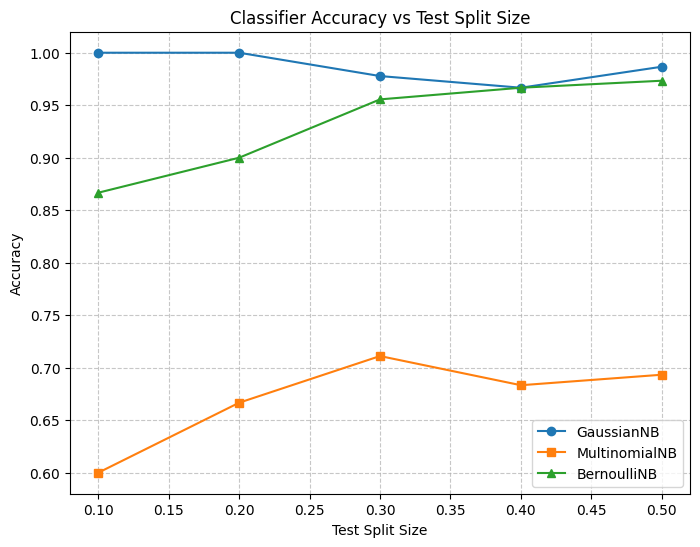

In [ ]:
# Train-Test Split
classifiers = [GaussianNB(var_smoothing=1e-9), BernoulliNB(), MultinomialNB(alpha=1)]

def plotter(X, y):
    sizes = []
    accuracies = []

    size = 0
    while size < 0.5:
        size += 0.1
        size = round(size, 2)
        sizes.append(size)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
        cur_score = classify(classifiers, X_train, y_train, X_test, y_test)
        accuracies.append(cur_score)

    # Convert results to DataFrame
    data_dict = {"split-size": sizes,
                 "GaussianNB": [acc[0] for acc in accuracies],
                 "MultinomialNB": [acc[1] for acc in accuracies],
                 "BernoulliNB": [acc[2] for acc in accuracies]}

    df = pd.DataFrame(data_dict)

    # Plot line graph
    plt.figure(figsize=(8, 6))
    plt.plot(df["split-size"], df["GaussianNB"], marker="o", label="GaussianNB")
    plt.plot(df["split-size"], df["MultinomialNB"], marker="s", label="MultinomialNB")
    plt.plot(df["split-size"], df["BernoulliNB"], marker="^", label="BernoulliNB")

    plt.xlabel("Test Split Size")
    plt.ylabel("Accuracy")
    plt.title("Classifier Accuracy vs Test Split Size")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

plotter(X1, y1_encoded)


--- Decision Tree (Iris - Gini Impurity) ---
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.98


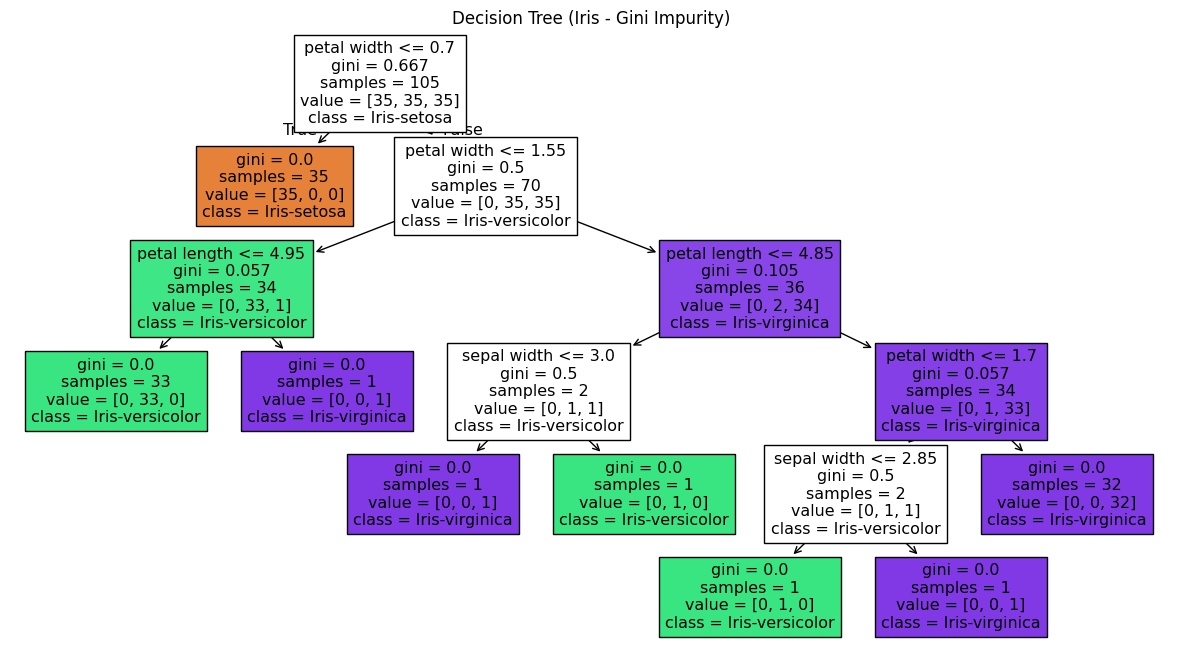


--- Decision Tree (Iris - Entropy) ---
Confusion Matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.81      0.87      0.84        15
 Iris-virginica       0.86      0.80      0.83        15

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45

Accuracy: 0.89


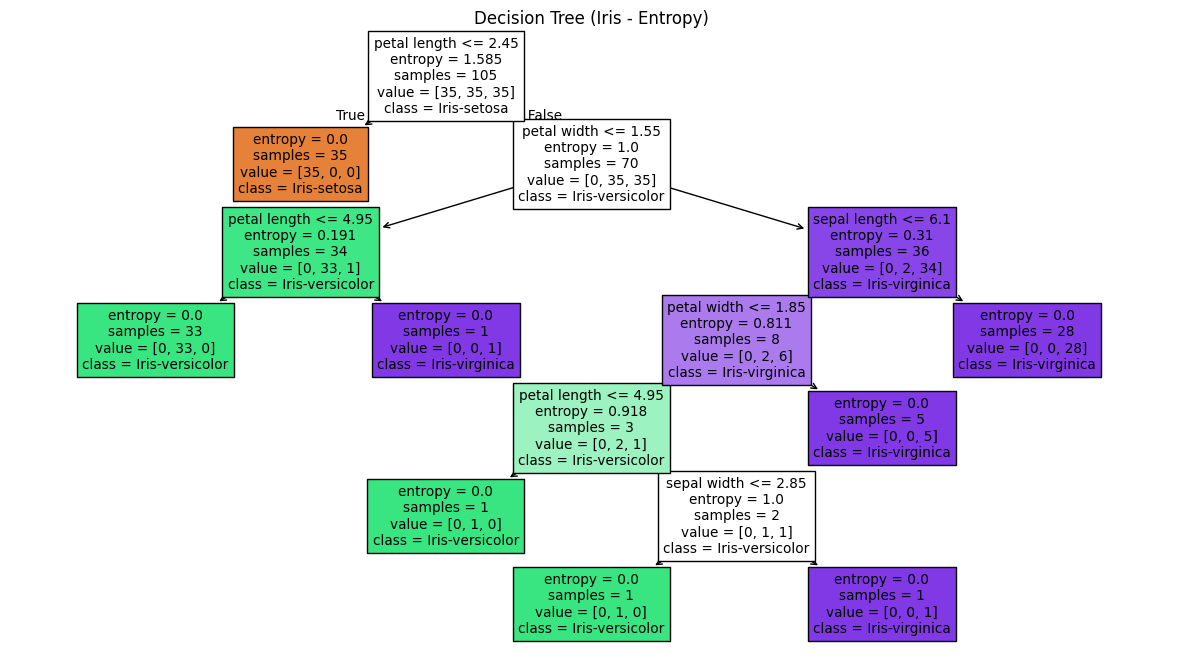

In [ ]:
# -------------------------------
# Decision Tree Classifier on Iris
# -------------------------------

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import numpy as np

# Load Iris dataset
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets.values.ravel()   # flatten to 1D

# Get class names from unique values of y
class_names = np.unique(y).astype(str)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# Decision Tree with Gini Impurity
# -------------------------------
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=0)
dt_gini.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)

print("--- Decision Tree (Iris - Gini Impurity) ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini, target_names=class_names))
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy: {accuracy_gini:.2f}")

plt.figure(figsize=(15, 8))
plot_tree(dt_gini, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree (Iris - Gini Impurity)")
plt.show()

# -------------------------------
# Decision Tree with Entropy
# -------------------------------
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)

print("\n--- Decision Tree (Iris - Entropy) ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy, target_names=class_names))
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy: {accuracy_entropy:.2f}")

plt.figure(figsize=(15, 8))
plot_tree(dt_entropy, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree (Iris - Entropy)")
plt.show()


Breast Cancer Classification


In [ ]:
# fetch dataset

breast_cancer_dataset = fetch_ucirepo(id=17)

X2 = breast_cancer_dataset.data.features
y2 = breast_cancer_dataset.data.targets

print("Shape:", X2.shape)
print(X2.head())

#possible values of output class
print(y2['Diagnosis'].unique())


Shape: (569, 30)
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     1

In [ ]:
le = LabelEncoder()
le.fit(y2)
y2_encoded=le.transform(y2)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Confusion Matrix: GaussianNB()
[[40  0]
 [ 1 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.94      0.97        17

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57

Accuracy: 0.9824561403508771
Confusion Matrix: BernoulliNB()
[[40  0]
 [ 7 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.59      0.74        17

    accuracy                           0.88        57
   macro avg       0.93      0.79      0.83        57
weighted avg       0.90      0.88      0.87        57

Accuracy: 0.8771929824561403
Confusion Matrix: MultinomialNB(alpha=1)
[[40  0]
 [ 1 16]]
Classification Report:
              precision    recall  f1-score   support

   

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       187
           1       0.98      0.45      0.62        98

    accuracy                           0.81       285
   macro avg       0.88      0.72      0.74       285
weighted avg       0.84      0.81      0.78       285

Accuracy: 0.8070175438596491
Confusion Matrix: MultinomialNB(alpha=1)
[[180   7]
 [ 22  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       187
           1       0.92      0.78      0.84        98

    accuracy                           0.90       285
   macro avg       0.90      0.87      0.88       285
weighted avg       0.90      0.90      0.90       285

Accuracy: 0.8982456140350877


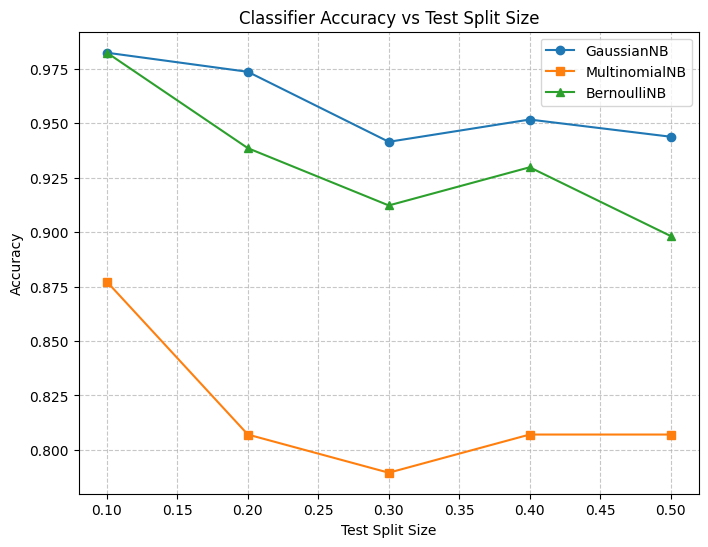

In [ ]:
plotter(X2, y2_encoded)

--- Decision Tree (Breast Cancer - Gini Impurity) ---
Confusion Matrix:
[[ 60   3]
 [  7 101]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        63
      benign       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


Accuracy: 0.94


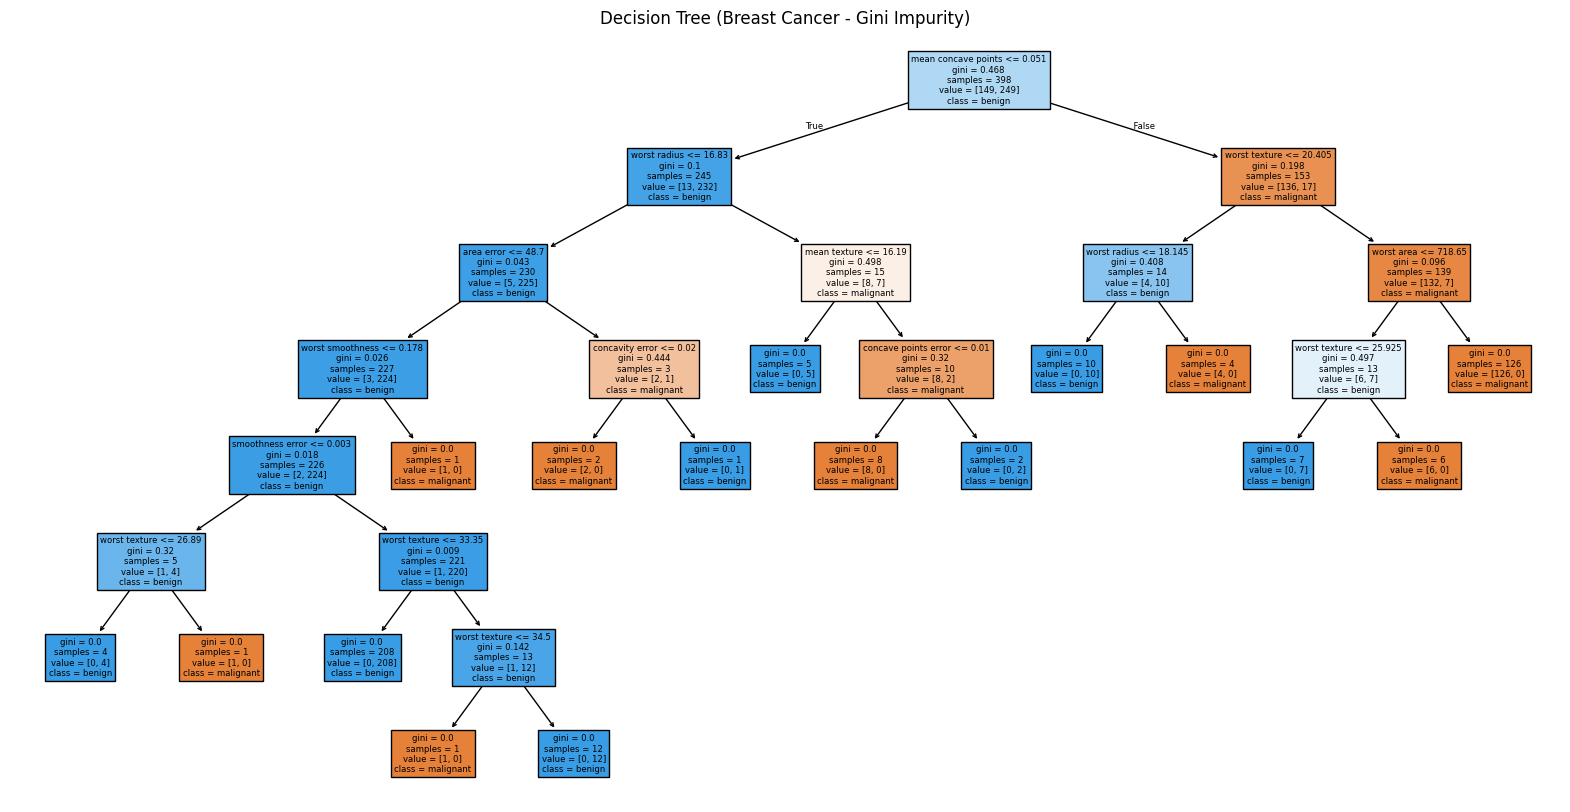


--- Decision Tree (Breast Cancer - Entropy) ---
Confusion Matrix:
[[ 59   4]
 [  2 106]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Accuracy: 0.96


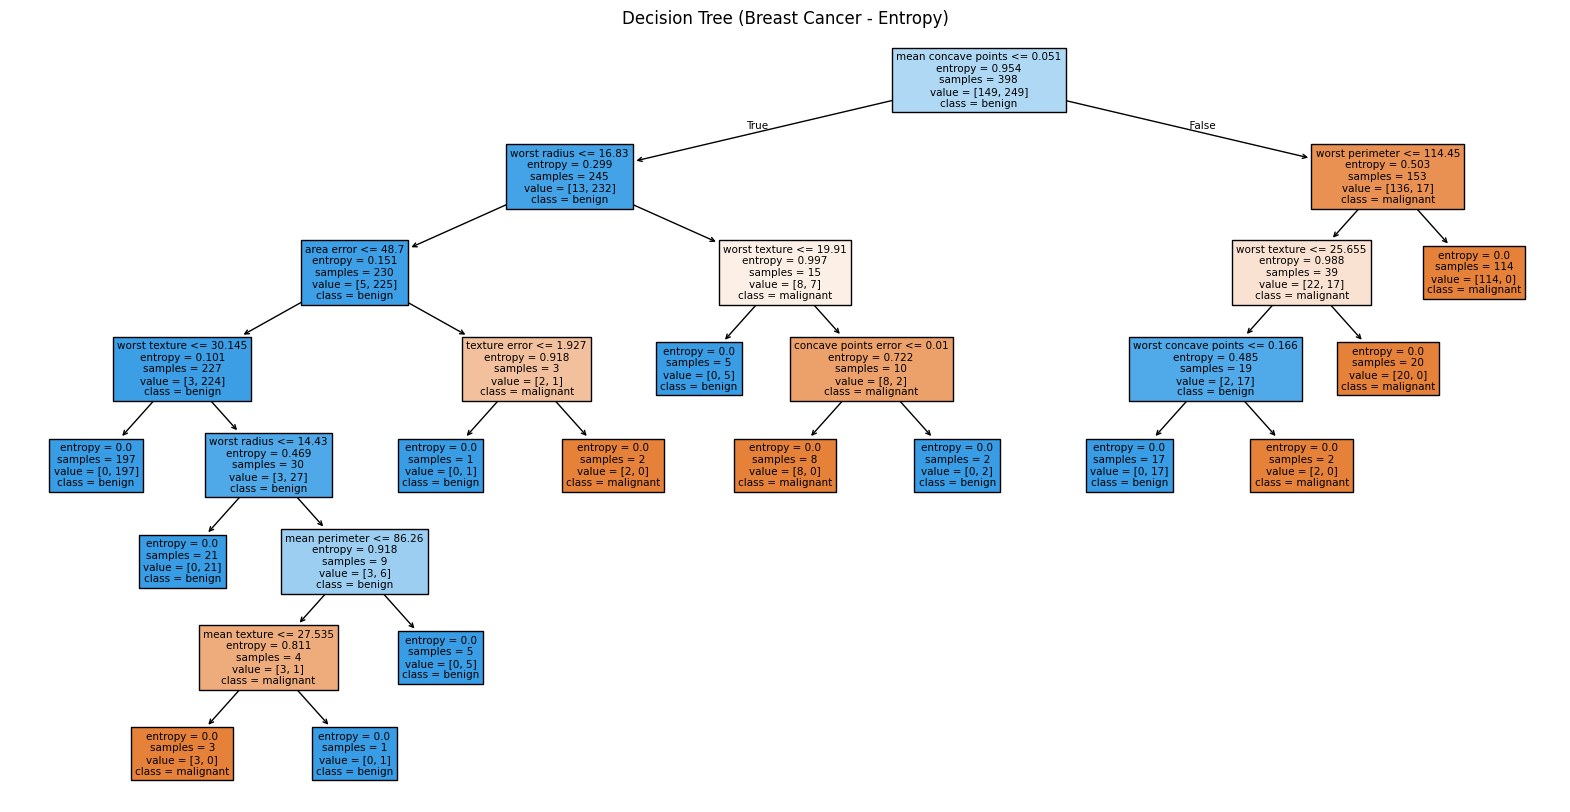

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# Decision Tree - Gini Impurity
# -----------------------------
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Predictions
y_pred_gini = dt_gini.predict(X_test)

# Evaluation
print("--- Decision Tree (Breast Cancer - Gini Impurity) ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gini, target_names=breast_cancer.target_names))
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"\nAccuracy: {accuracy_gini:.2f}")

# Visualization
plt.figure(figsize=(20,10))
plot_tree(dt_gini, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, filled=True)
plt.title("Decision Tree (Breast Cancer - Gini Impurity)")
plt.show()

# -----------------------------
# Decision Tree - Entropy
# -----------------------------
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Predictions
y_pred_entropy = dt_entropy.predict(X_test)

# Evaluation
print("\n--- Decision Tree (Breast Cancer - Entropy) ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy, target_names=breast_cancer.target_names))
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"\nAccuracy: {accuracy_entropy:.2f}")

# Visualization
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, filled=True)
plt.title("Decision Tree (Breast Cancer - Entropy)")
plt.show()
